In [137]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
from collections import defaultdict 

(-0.5, 348.5, 192.5, -0.5)

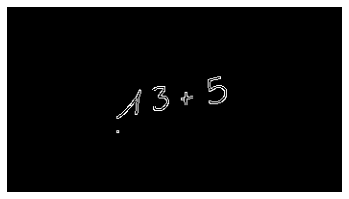

In [138]:
image = cv2.imread('/Users/matteoblack/Desktop/Proj/visi-solve/symbol-decomposition/output01.png') 

canny = cv2.Canny(image, 30, 150, 3) 
dilated = cv2.dilate(canny, (1, 1), iterations=0) 

plt.imshow(dilated, cmap='gray') 
plt.axis('off')

(-0.5, 348.5, 192.5, -0.5)

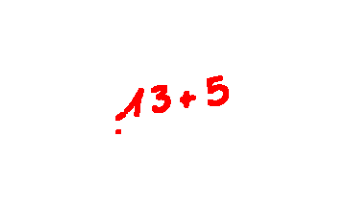

In [139]:
harris = copy.deepcopy(image)

tmp = cv2.cvtColor(harris, cv2.COLOR_BGR2GRAY)
tmp = np.float32(tmp)

dst = cv2.cornerHarris(tmp, 2, 1, 0.0001)
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
harris[dst > 0.001 * dst.max()] = [255, 0, 0]
X = list()
max_value = dst.max()
for c in range(dst.shape[0]):
    for r in range(dst.shape[1]):
        if dst[c, r] > 0.001 * max_value:
            X.append([r, c])

plt.imshow(harris, cmap='gray') 
plt.axis('off')

In [140]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth


In [141]:

# The following bandwidth can be automatically detected using
X = np.array(X)
bandwidth = estimate_bandwidth(X, quantile = 180 / X.shape[0])

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 4


In [142]:
180 / X.shape[0]

0.13062409288824384

440
374
391
173


(-0.5, 348.5, 192.5, -0.5)

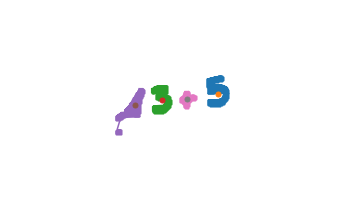

In [143]:
clustering = copy.deepcopy(image)

plt.imshow(clustering, cmap='gray') 
clusters = defaultdict(list)
clusters_y = defaultdict(int)
for k in range(n_clusters_):
    my_members = labels == k
    print(sum(my_members))
    if sum(my_members) > 100:
        clusters[int(cluster_centers[k][0])] = X[my_members]
        plt.plot(X[my_members, 0], X[my_members, 1], marker='o', markersize=1)
        plt.plot(int(cluster_centers[k][0]), int(cluster_centers[k][1]), marker='o', markersize=5)
plt.axis('off')

In [144]:
clusters.keys()

dict_keys([219, 161, 133, 187])

(-0.5, 348.5, 192.5, -0.5)

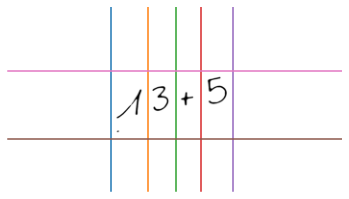

In [145]:
final = copy.deepcopy(image)

plt.imshow(clustering, cmap='gray') 

keys = sorted(clusters.keys())

min_val = min(clusters[keys[0]][:, 0]) - 5
plt.plot([min_val for _ in range(image.shape[0])], np.arange(0, image.shape[0]))

for i in range(len(keys) - 1):
    if abs(keys[i] - keys[i + 1]) > 20:
        max_val = max(clusters[keys[i]][:, 0])
        min_val = min(clusters[keys[i + 1]][:, 0])
        avg = (max_val + min_val) // 2
        plt.plot([avg for _ in range(image.shape[0])], np.arange(0, image.shape[0]))

max_val = max(clusters[keys[-1]][:, 0]) + 5
plt.plot([max_val for _ in range(image.shape[0])], np.arange(0, image.shape[0]))


upper_cut = max(X[:,1]) + 5
plt.plot(np.arange(0, image.shape[1]), [upper_cut for _ in range(image.shape[1])])
bottom_cut = min(X[:,1]) - 5
plt.plot(np.arange(0, image.shape[1]), [bottom_cut for _ in range(image.shape[1])])

plt.axis('off')

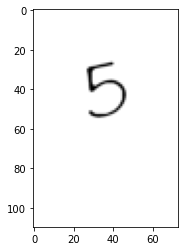

In [146]:
padding = 20

final = copy.deepcopy(image)
final = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
keys = sorted(clusters.keys())

left_cut = min(clusters[keys[0]][:, 0]) - 5
upper_cut = max(X[:,1]) + 5
bottom_cut = min(X[:,1]) - 5

zeros_v = np.zeros((upper_cut - bottom_cut, padding)) + 255

counter = 0
for i in range(len(keys) - 1):
    if abs(keys[i] - keys[i + 1]) > 20:
        max_val = max(clusters[keys[i]][:, 0])
        min_val = min(clusters[keys[i + 1]][:, 0])
        right_cut = (max_val + min_val) // 2

        zeros_h = np.zeros((padding, right_cut - left_cut + 2 * padding)) + 255

        img = final[bottom_cut:upper_cut, left_cut:right_cut]
        img = np.c_[img, zeros_v]
        img = np.c_[zeros_v, img]
        img = np.vstack([img, zeros_h])
        img = np.vstack([zeros_h, img])

        plt.imshow(img, cmap='gray')
        plt.savefig(f'digit{counter}')
        plt.clf()

        left_cut = right_cut
        counter += 1

right_cut = max(clusters[keys[-1]][:, 0]) + 5
zeros_h = np.zeros((padding, right_cut - left_cut + 2 * padding)) + 255

img = final[bottom_cut:upper_cut, left_cut:right_cut]
img = np.c_[img, zeros_v]
img = np.c_[zeros_v, img]
img = np.vstack([img, zeros_h])
img = np.vstack([zeros_h, img])

plt.imshow(img, cmap='gray')
plt.savefig(f'digit{counter}')